In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'shibushreeabhishek'
os.environ['KAGGLE_KEY'] = '6795180be704f0c91fa46c41dddda5b9'

In [3]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 93% 193M/207M [00:01<00:00, 111MB/s] 
100% 207M/207M [00:01<00:00, 117MB/s]


In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_No_mask_dir = os.path.join(train_dir,'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[0:10])

['0566.jpg', '1635.jpg', '0772.jpg', '1234.jpg', '1378.jpg', '0733.jpg', '1054.jpg', '1290.jpg', '1246.jpg', '0644.jpg']


In [7]:
train_No_mask_names = os.listdir(train_No_mask_dir)
print(train_No_mask_names[0:10])

['100.jpg', '232.jpg', '302.jpg', '138.jpg', '345.jpg', '14.jpg', '12.jpg', '265.jpg', '13.jpg', '18.jpg']


In [8]:
mask_images = []

for i in train_mask_names:
  mask_images.append(os.path.join(train_mask_dir,i))

non_mask_images=[]

for i in train_No_mask_names:
  non_mask_images.append(os.path.join(train_No_mask_dir,i))

In [9]:
import plotly.express as px
from skimage import io
from skimage.transform import resize

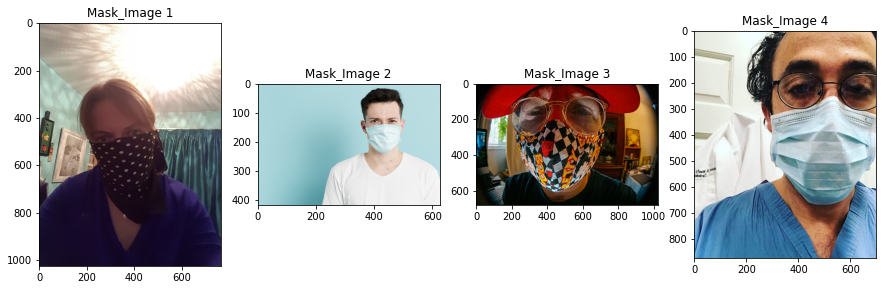

In [10]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(mask_images[0])
img2 = io.imread(mask_images[1])
img3 = io.imread(mask_images[2])
img4 = io.imread(mask_images[3])

ax[0].imshow(img1)
ax[0].set_title("Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Mask_Image 4")


plt.show()

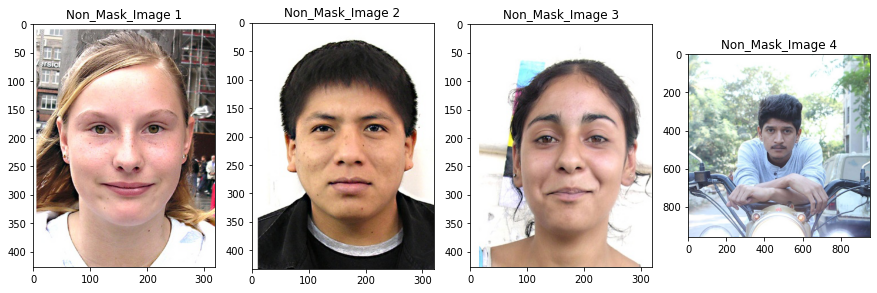

In [11]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(non_mask_images[0])
img2 = io.imread(non_mask_images[1])
img3 = io.imread(non_mask_images[2])
img4 = io.imread(non_mask_images[3])

ax[0].imshow(img1)
ax[0].set_title("Non_Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Non_Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Non_Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Non_Mask_Image 4")


plt.show()

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=25,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(300,300),
                                                  batch_size=32,
                                                  class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [14]:
train_generator.image_shape

(300, 300, 3)

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(300,300,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 150, 150, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 75, 75, 64)        0

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [18]:
model_train = model.fit(train_generator,epochs=25,
          validation_data=valid_generator,
          batch_size=32)

Epoch 1/25
19/19 [==============================] - 122s 6s/step - loss: 1.0025 - accuracy: 0.5033 - val_loss: 0.6895 - val_accuracy: 0.5458
Epoch 2/25
19/19 [==============================] - 118s 6s/step - loss: 0.6597 - accuracy: 0.5950 - val_loss: 0.6901 - val_accuracy: 0.5850
Epoch 3/25
19/19 [==============================] - 118s 6s/step - loss: 0.6721 - accuracy: 0.5883 - val_loss: 0.6895 - val_accuracy: 0.5882
Epoch 4/25
19/19 [==============================] - 118s 6s/step - loss: 0.6417 - accuracy: 0.6317 - val_loss: 0.6884 - val_accuracy: 0.6176
Epoch 5/25
19/19 [==============================] - 118s 6s/step - loss: 0.6289 - accuracy: 0.6600 - val_loss: 0.6858 - val_accuracy: 0.6275
Epoch 6/25
19/19 [==============================] - 118s 6s/step - loss: 0.5896 - accuracy: 0.6967 - val_loss: 0.6735 - val_accuracy: 0.7320
Epoch 7/25
19/19 [==============================] - 118s 6s/step - loss: 0.5469 - accuracy: 0.7417 - val_loss: 0.6522 - val_accuracy: 0.7876
Epoch 8/25
19

In [19]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics.head(10)

,loss,accuracy,val_loss,val_accuracy
0,1.002517,0.503333,0.689538,0.545752
1,0.659700,0.595000,0.690102,0.584967
2,0.672056,0.588333,0.689469,0.588235
3,0.641728,0.631667,0.688428,0.617647
4,0.628918,0.660000,0.685752,0.627451
5,0.589583,0.696667,0.673507,0.732026
6,0.546894,0.741667,0.652173,0.787582
7,0.541880,0.728333,0.640563,0.803922
8,0.454472,0.800000,0.603978,0.830065
9,0.400120,0.835000,0.561080,0.826797


In [21]:
test_loss,test_accuracy = model.evaluate_generator(test_generator)

In [22]:
print('test_loss: ',test_loss)
print('test_accuracy: ',test_accuracy)

test_loss:  0.3938271999359131
test_accuracy:  0.8899999856948853
